**Setting up Spark on our Colab environment.**

In [ ]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [55.5 kB]
Hit:12 http://ppa.launchpad.net/cran/

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 95 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading database ... 160690 files and directories currently installed.)
Preparing to unpack .../openjdk-8-jre-headless_8u292-b10-0ubuntu1~18.04_amd64.deb ...
Unpacking openjdk-8-jre-headless:amd64 (8u292-b10-0ubuntu1~18.04) ...
Selecting previously unselected package openjdk-8-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
cur_path = "/content/drive/MyDrive/Colab Notebooks/Big Data/Final Project/"
os.chdir(cur_path)
!pwd

/content/drive/MyDrive/Colab Notebooks/Big Data/Final Project


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('final_project').getOrCreate()

In [ ]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
#sc= SparkContext()
sqlContext = SQLContext(spark)
data = spark.read.csv(cur_path + 'DisneylandReviews.csv',inferSchema=True,header=True)

In [ ]:
data.show()

+---------+------+----------+--------------------+--------------------+-------------------+
|Review_ID|Rating|Year_Month|   Reviewer_Location|         Review_Text|             Branch|
+---------+------+----------+--------------------+--------------------+-------------------+
|670772142|     4|    2019-4|           Australia|If you've ever be...|Disneyland_HongKong|
|670682799|     4|    2019-5|         Philippines|Its been a while ...|Disneyland_HongKong|
|670623270|     4|    2019-4|United Arab Emirates|Thanks God it was...|Disneyland_HongKong|
|670607911|     4|    2019-4|           Australia|HK Disneyland is ...|Disneyland_HongKong|
|670607296|     4|    2019-4|      United Kingdom|the location is n...|Disneyland_HongKong|
|670591897|     3|    2019-4|           Singapore|Have been to Disn...|Disneyland_HongKong|
|670585330|     5|    2019-4|               India|Great place! Your...|Disneyland_HongKong|
|670574142|     3|    2019-3|            Malaysia|Think of it as an...|Disneylan

In [ ]:
print((data.count(), len(data.columns)))

(42656, 6)


##### Our dataset has 42,656 rows and 8 columns.

#### **Checking for NA values:**

In [ ]:
from pyspark.sql.functions import isnan, when, count, col

data.select([count(when(isnan(c), c)).alias(c) for c in data.columns]).show()

+---------+------+----------+-----------------+-----------+------+
|Review_ID|Rating|Year_Month|Reviewer_Location|Review_Text|Branch|
+---------+------+----------+-----------------+-----------+------+
|        0|     0|         0|                0|          0|     0|
+---------+------+----------+-----------------+-----------+------+



In [ ]:
data.printSchema()

root
 |-- Review_ID: integer (nullable = true)
 |-- Rating: integer (nullable = true)
 |-- Year_Month: string (nullable = true)
 |-- Reviewer_Location: string (nullable = true)
 |-- Review_Text: string (nullable = true)
 |-- Branch: string (nullable = true)



#### **changing date column to type datetime**

In [ ]:
from pyspark.sql.types import TimestampType 
from pyspark.sql.types import DateType 

data = data.withColumn('Year_Month', data['Year_Month'].cast(DateType()))

In [ ]:
data.printSchema()

root
 |-- Review_ID: integer (nullable = true)
 |-- Rating: integer (nullable = true)
 |-- Year_Month: date (nullable = true)
 |-- Reviewer_Location: string (nullable = true)
 |-- Review_Text: string (nullable = true)
 |-- Branch: string (nullable = true)



In [ ]:
data.show()

+---------+------+----------+--------------------+--------------------+-------------------+
|Review_ID|Rating|Year_Month|   Reviewer_Location|         Review_Text|             Branch|
+---------+------+----------+--------------------+--------------------+-------------------+
|670772142|     4|2019-04-01|           Australia|If you've ever be...|Disneyland_HongKong|
|670682799|     4|2019-05-01|         Philippines|Its been a while ...|Disneyland_HongKong|
|670623270|     4|2019-04-01|United Arab Emirates|Thanks God it was...|Disneyland_HongKong|
|670607911|     4|2019-04-01|           Australia|HK Disneyland is ...|Disneyland_HongKong|
|670607296|     4|2019-04-01|      United Kingdom|the location is n...|Disneyland_HongKong|
|670591897|     3|2019-04-01|           Singapore|Have been to Disn...|Disneyland_HongKong|
|670585330|     5|2019-04-01|               India|Great place! Your...|Disneyland_HongKong|
|670574142|     3|2019-03-01|            Malaysia|Think of it as an...|Disneylan

In [ ]:
from pyspark.sql import functions as F
data = data.withColumn('Month',F.from_unixtime(F.unix_timestamp(col('Year_Month'),'yyyy-MM-dd'),'MM'))

In [ ]:
data = data.withColumn('Year',F.from_unixtime(F.unix_timestamp(col('Year_Month'),'yyyy-MM-dd'),'yyyy'))

In [ ]:
data.show()

+---------+------+----------+--------------------+--------------------+-------------------+-----+----+
|Review_ID|Rating|Year_Month|   Reviewer_Location|         Review_Text|             Branch|Month|Year|
+---------+------+----------+--------------------+--------------------+-------------------+-----+----+
|670772142|     4|2019-04-01|           Australia|If you've ever be...|Disneyland_HongKong|   04|2019|
|670682799|     4|2019-05-01|         Philippines|Its been a while ...|Disneyland_HongKong|   05|2019|
|670623270|     4|2019-04-01|United Arab Emirates|Thanks God it was...|Disneyland_HongKong|   04|2019|
|670607911|     4|2019-04-01|           Australia|HK Disneyland is ...|Disneyland_HongKong|   04|2019|
|670607296|     4|2019-04-01|      United Kingdom|the location is n...|Disneyland_HongKong|   04|2019|
|670591897|     3|2019-04-01|           Singapore|Have been to Disn...|Disneyland_HongKong|   04|2019|
|670585330|     5|2019-04-01|               India|Great place! Your...|Di

In [ ]:
from pyspark.sql.functions import min, max
min_date, max_date = data.select(min("Year_Month"), max("Year_Month")).first()
min_date, max_date

(datetime.date(2010, 3, 1), datetime.date(2019, 5, 1))

##### The earliest review was in March 2010. The most recent review was in May 2019.

#### **Exploring some of the key columns:**

#### 1. Reviewer_Location

In [ ]:
data.select(F.countDistinct("Reviewer_Location")).show()

+---------------------------------+
|count(DISTINCT Reviewer_Location)|
+---------------------------------+
|                              162|
+---------------------------------+



There are 162 unique reviewer locations.

#### The most popular reviewer locations:

In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.functions import desc

rev_locs = data.groupBy('Reviewer_Location').count().sort(desc("count")).show()

+--------------------+-----+
|   Reviewer_Location|count|
+--------------------+-----+
|       United States|14551|
|      United Kingdom| 9751|
|           Australia| 4679|
|              Canada| 2235|
|               India| 1511|
|         Philippines| 1070|
|           Singapore| 1037|
|         New Zealand|  756|
|            Malaysia|  588|
|           Hong Kong|  554|
|           Indonesia|  530|
|             Ireland|  487|
|United Arab Emirates|  350|
|         Netherlands|  253|
|              France|  243|
|        South Africa|  242|
|            Thailand|  223|
|             Germany|  194|
|               China|  181|
|               Spain|  147|
+--------------------+-----+
only showing top 20 rows



#### 2. Branch

In [ ]:
data.select(F.countDistinct("Branch")).show()

+----------------------+
|count(DISTINCT Branch)|
+----------------------+
|                     3|
+----------------------+



In [ ]:
data.select("Branch").distinct().show()

+--------------------+
|              Branch|
+--------------------+
| Disneyland_HongKong|
|    Disneyland_Paris|
|Disneyland_Califo...|
+--------------------+



There are 3 unique Branches.

In [ ]:
unique_branches = data.groupBy('Branch').count().sort(desc("count")).show()

+--------------------+-----+
|              Branch|count|
+--------------------+-----+
|Disneyland_Califo...|19406|
|    Disneyland_Paris|13630|
| Disneyland_HongKong| 9620|
+--------------------+-----+



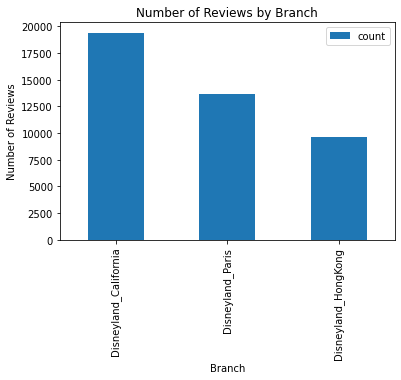

In [ ]:
data.groupBy('Branch').count().sort(desc("count")).toPandas().plot(x='Branch',y='count',kind='bar', title="Number of Reviews by Branch", ylabel = 'Number of Reviews')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data.groupBy('Rating').count().sort(desc('count')).show()

+------+-----+
|Rating|count|
+------+-----+
|     5|23146|
|     4|10775|
|     3| 5109|
|     2| 2127|
|     1| 1499|
+------+-----+



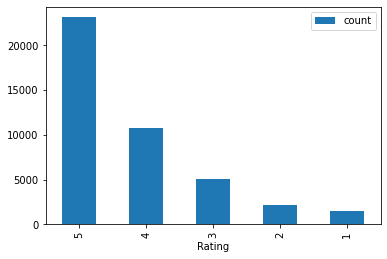

In [ ]:
data.groupBy('Rating').count().sort(desc('count')).toPandas().plot(x='Rating',y='count',kind='bar')
display()

In [ ]:
data.groupBy('Branch').agg({'Rating':'avg'}).sort(desc('avg(Rating)')).show()

+--------------------+-----------------+
|              Branch|      avg(Rating)|
+--------------------+-----------------+
|Disneyland_Califo...|4.405338555086056|
| Disneyland_HongKong|4.204158004158004|
|    Disneyland_Paris| 3.96008804108584|
+--------------------+-----------------+



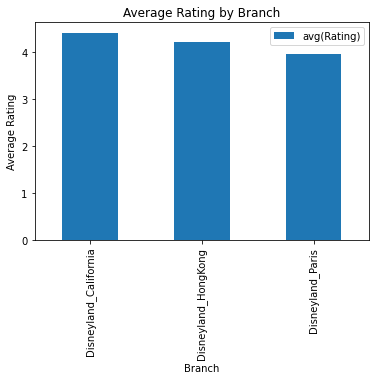

In [ ]:
data.groupby('Branch').agg({"Rating":'avg'}).sort(desc('avg(Rating)')).toPandas().plot(x='Branch',y='avg(Rating)',kind='bar', ylabel = 'Average Rating', title = 'Average Rating by Branch')
display()

In [ ]:
data.groupby('Branch', 'Rating').count().sort(desc('Rating')).show()

+--------------------+------+-----+
|              Branch|Rating|count|
+--------------------+------+-----+
|Disneyland_Califo...|     5|12518|
| Disneyland_HongKong|     5| 4517|
|    Disneyland_Paris|     5| 6111|
|Disneyland_Califo...|     4| 3981|
| Disneyland_HongKong|     4| 3230|
|    Disneyland_Paris|     4| 3564|
|Disneyland_Califo...|     3| 1661|
| Disneyland_HongKong|     3| 1365|
|    Disneyland_Paris|     3| 2083|
|    Disneyland_Paris|     2| 1044|
| Disneyland_HongKong|     2|  336|
|Disneyland_Califo...|     2|  747|
| Disneyland_HongKong|     1|  172|
|Disneyland_Califo...|     1|  499|
|    Disneyland_Paris|     1|  828|
+--------------------+------+-----+



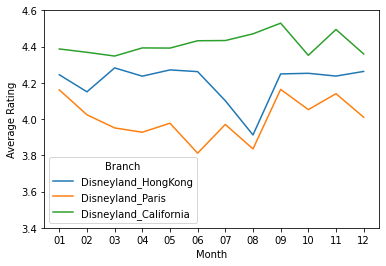

In [ ]:
import seaborn as sns
ratings_month = data.groupby(['Branch', 'Month']).agg({'Rating':'mean'}).sort('Month').toPandas().dropna()
ax = sns.lineplot(data=ratings_month,x='Month',y='avg(Rating)', hue = 'Branch')
ax.set(xlabel='Month',ylabel='Average Rating', ylim = (3.4,4.6))
plt.show()

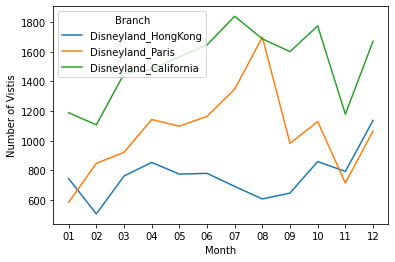

In [ ]:
import seaborn as sns
ratings_month = data.groupby(['Branch', 'Month']).count().sort('Month').toPandas().dropna()
ax = sns.lineplot(data=ratings_month,x='Month',y='count', hue = 'Branch')
ax.set(xlabel='Month',ylabel='Number of Vistis')
plt.show()

In [ ]:
Cal = data.filter(data['Branch'] == 'Disneyland_California')
Hkg = data.filter(data['Branch'] == 'Disneyland_HongKong')
Par = data.filter(data['Branch'] == 'Disneyland_Paris')

In [ ]:
cal_ratings = Cal.groupby('Month').agg({'Rating':'avg'}).sort(desc('Month'))
hkg_ratings = Hkg.groupby('Month').agg({'Rating':'avg'}).sort(desc('Month'))
par_ratings = Par.groupby('Month').agg({'Rating':'avg'}).sort(desc('Month'))

In [ ]:
cal_ratings = cal_ratings.dropna().sort('Month')
hkg_ratings = hkg_ratings.dropna().sort('Month')
par_ratings = par_ratings.dropna().sort('Month')
month_ratings = cal_ratings.toPandas()

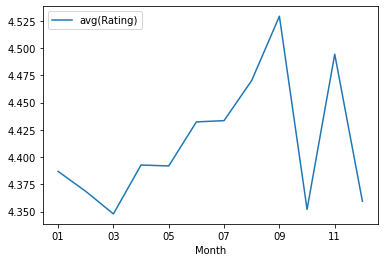

In [ ]:
cal_ratings.toPandas().plot(x='Month',y='avg(Rating)',kind='line')
display()

In [ ]:
hkg_ratings = Hkg.groupby('Month').agg({'Rating':'avg'}).sort(desc('Month'))

In [ ]:
hkg_ratings.show()

+-----+------------------+
|Month|       avg(Rating)|
+-----+------------------+
|   12| 4.262972735268249|
|   11| 4.237373737373737|
|   10|4.2526193247962745|
|   09|  4.24922600619195|
|   08|3.9125412541254128|
|   07| 4.101302460202605|
|   06|4.2618741976893455|
|   05| 4.271317829457364|
|   04| 4.236811254396248|
|   03| 4.282522996057819|
|   02| 4.150495049504951|
|   01| 4.244623655913978|
| null| 3.985200845665962|
+-----+------------------+



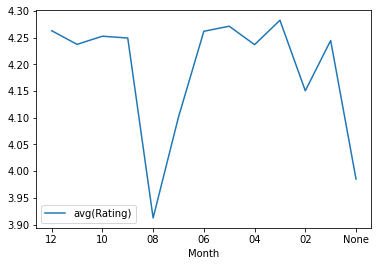

In [ ]:
hkg_ratings.toPandas().plot(x='Month',y='avg(Rating)',kind='line')
display()

In [ ]:
par_ratings = Par.groupby('Month').agg({'Rating':'avg'}).sort(desc('Month'))

In [ ]:
par_ratings.show()

+-----+------------------+
|Month|       avg(Rating)|
+-----+------------------+
|   12| 4.010328638497652|
|   11| 4.140056022408964|
|   10| 4.052258635961027|
|   09| 4.163951120162933|
|   08| 3.835294117647059|
|   07| 3.970326409495549|
|   06|3.8118556701030926|
|   05| 3.977231329690346|
|   04|3.9273840769903763|
|   03|  3.95114006514658|
|   02| 4.023612750885478|
|   01| 4.161234991423671|
| null|3.6826923076923075|
+-----+------------------+



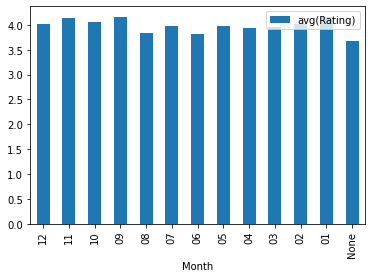

In [ ]:
par_ratings.toPandas().plot(x='Month',y='avg(Rating)',kind='bar')
display()

In [ ]:
cal_visits = Cal.groupby('Month').count().sort(desc('Month'))

In [ ]:
cal_visits.show()

+-----+-----+
|Month|count|
+-----+-----+
|   12| 1672|
|   11| 1179|
|   10| 1776|
|   09| 1602|
|   08| 1688|
|   07| 1841|
|   06| 1647|
|   05| 1567|
|   04| 1482|
|   03| 1452|
|   02| 1107|
|   01| 1189|
| null| 1204|
+-----+-----+



<Figure size 432x288 with 0 Axes>

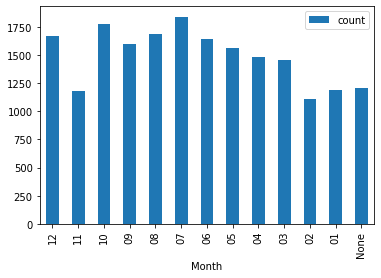

In [ ]:
plt.clf()
cal_visits.toPandas().plot(x='Month',y='count',kind='bar')
display()

In [ ]:
hkg_visits = Hkg.groupby('Month').count().sort(desc('Month'))

In [ ]:
hkg_visits.show()

+-----+-----+
|Month|count|
+-----+-----+
|   12| 1137|
|   11|  792|
|   10|  859|
|   09|  646|
|   08|  606|
|   07|  691|
|   06|  779|
|   05|  774|
|   04|  853|
|   03|  761|
|   02|  505|
|   01|  744|
| null|  473|
+-----+-----+



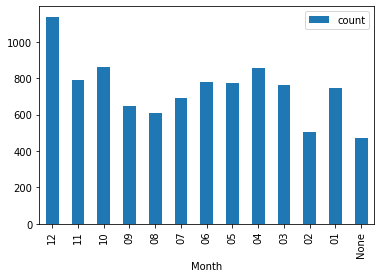

In [ ]:
hkg_visits.toPandas().plot(x='Month',y='count',kind='bar')
display()

In [ ]:
par_visits = Par.groupby('Month').count().sort(desc('Month'))

In [ ]:
par_visits.show()

+-----+-----+
|Month|count|
+-----+-----+
|   12| 1065|
|   11|  714|
|   10| 1129|
|   09|  982|
|   08| 1700|
|   07| 1348|
|   06| 1164|
|   05| 1098|
|   04| 1143|
|   03|  921|
|   02|  847|
|   01|  583|
| null|  936|
+-----+-----+



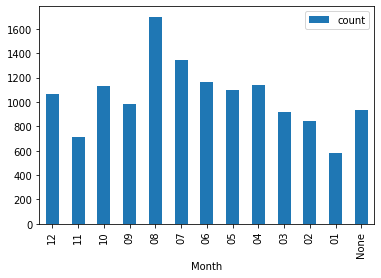

In [ ]:
par_visits.toPandas().plot(x='Month',y='count',kind='bar')
display()

In [ ]:
avg_review_length = data.toPandas().groupby('Rating').Review_Text.apply(lambda x: x.str.split().str.len().mean())

In [ ]:
avg_review_length

Rating
1    197.166111
2    186.272214
3    154.654531
4    139.099582
5    110.255120
Name: Review_Text, dtype: float64

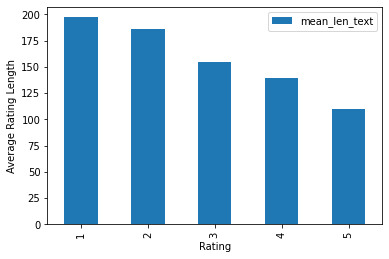

In [ ]:
avg_review_length.reset_index(name='mean_len_text').plot(x='Rating', y='mean_len_text',kind='bar', ylabel = 'Average Rating Length')
display()

In [ ]:
review_len_branch = data.toPandas().groupby(['Branch','Rating'], as_index=False).Review_Text.apply(lambda x: x.str.split().str.len().mean())

In [ ]:
review_len_branch

,Branch,Rating,Review_Text
0,Disneyland_California,1,188.374749
1,Disneyland_California,2,176.285141
2,Disneyland_California,3,143.399759
3,Disneyland_California,4,128.714142
4,Disneyland_California,5,100.984343
5,Disneyland_HongKong,1,137.418605
6,Disneyland_HongKong,2,102.747024
7,Disneyland_HongKong,3,100.022711
8,Disneyland_HongKong,4,107.031579
9,Disneyland_HongKong,5,98.147000


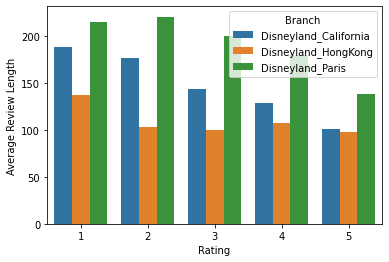

In [ ]:
import seaborn as sns
ax = sns.barplot(data=review_len_branch,x='Rating',y='Review_Text', hue = 'Branch')
ax.set(xlabel='Rating',ylabel='Average Review Length')
plt.show()

In [ ]:
data.show(3)

+---------+------+----------+--------------------+--------------------+-------------------+-----+----+
|Review_ID|Rating|Year_Month|   Reviewer_Location|         Review_Text|             Branch|Month|Year|
+---------+------+----------+--------------------+--------------------+-------------------+-----+----+
|670772142|     4|2019-04-01|           Australia|If you've ever be...|Disneyland_HongKong|   04|2019|
|670682799|     4|2019-05-01|         Philippines|Its been a while ...|Disneyland_HongKong|   05|2019|
|670623270|     4|2019-04-01|United Arab Emirates|Thanks God it was...|Disneyland_HongKong|   04|2019|
+---------+------+----------+--------------------+--------------------+-------------------+-----+----+
only showing top 3 rows



In [ ]:
data.count()

#### Modeling:
- Binary classification of Ratings (good or bad)
- Multilabel classification to predict the exact Rating of a Review_Text

#### Creating a new dataframe for feature engineering

In [ ]:
my_cols = data.select(['Review_ID','Rating','Review_Text'])
my_data = my_cols.dropna()
my_data.show(3)

- Setting a threshold for Ratings: good = 1, bad = 0. 
- Let's assume that a Rating 3+ is good and a rating of 1 or 2 is bad.

In [ ]:
my_data = my_data.withColumn(
    'label',
    F.when((F.col("Rating") == 3), 1)\
    .when((F.col("Rating") == 4) , 1)\
    .when((F.col("Rating") == 5) , 1)\
    .otherwise(0)
)
my_data.show(3)

#### Removing punctuations, etc.

In [ ]:
# Import the necessary functions
from pyspark.sql.functions import regexp_replace
from pyspark.ml.feature import Tokenizer

wrangled = my_data.withColumn('Review_Text', regexp_replace(my_data.Review_Text, '[_():;,.!?\\-]', " "))
wrangled = wrangled.withColumn('Review_Text', regexp_replace(wrangled.Review_Text, '[0-9]', " "))

# Merge multiple spaces
wrangled = wrangled.withColumn('Review_Text', regexp_replace(wrangled.Review_Text, ' +', ' '))

# Split the text into words
wrangled = Tokenizer(inputCol='Review_Text', outputCol="words").transform(wrangled)
 
wrangled.show(4, truncate=True)


#### Removing stop words, etc.

In [ ]:
from pyspark.ml.feature import StopWordsRemover, HashingTF, IDF

# Remove stop words.
wrangled = StopWordsRemover(inputCol='words', outputCol='terms')\
      .transform(wrangled)
 
# Apply the hashing trick
wrangled = HashingTF(inputCol = 'terms', outputCol = 'hash', numFeatures=1024)\
      .transform(wrangled)


In [ ]:
wrangled.show(4, truncate=True)

#### TF-IDF

In [ ]:
# Convert hashed symbols to TF-IDF
tf_idf = IDF(inputCol = 'hash', outputCol = 'features')\
      .fit(wrangled).transform(wrangled)
      
tf_idf.select('features', 'label').show(3, truncate=True)

In [ ]:
type(tf_idf)

Binary classification modeling

In [ ]:
from pyspark.ml.classification import LogisticRegression

# Split the data into training and testing sets
(train_df, test_df) = tf_idf.randomSplit([0.8,0.2], seed=13)



In [ ]:
train_df.show(3)

In [ ]:
test_df.show(3)

In [ ]:
# Fit a Logistic Regression model to the training data
logistic = LogisticRegression(regParam=0.2).fit(train_df)
 
# Make predictions on the testing data
prediction = logistic.transform(test_df)

#### Model Evaluation

In [ ]:
# Create a confusion matrix, comparing predictions to known labels
prediction.groupBy('label', 'prediction').count().show()

In [ ]:
# Calculate the elements of the confusion matrix
TN = prediction.filter('prediction = 0 AND label = prediction').count()
TP = prediction.filter('prediction = 1 AND label = prediction').count()
FN = prediction.filter('prediction = 0 AND label = 1').count()
FP = prediction.filter('prediction = 1 AND label = 0').count()

In [ ]:
# Accuracy measures the proportion of correct predictions
accuracy = (TN +TP)/(TN + TP +FN +FP)
print(accuracy)

In [ ]:
# Calculate precision and recall
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print('precision = {:.2f}\nrecall    = {:.2f}'.format(precision, recall))

In [ ]:
# Find weighted precision
from pyspark.ml.evaluation import BinaryClassificationEvaluator
 
# Find AUC
auc = binary_evaluator.evaluate(prediction, {binary_evaluator.metricName: "areaUnderROC"})
print(auc)

Pipeline for Binary Classification, using Logistic Regression

In [ ]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
 
# Break text into tokens at non-word characters
tokenizer = Tokenizer(inputCol='Review_Text', outputCol='words')
 
# Remove stop words
remover = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol='terms')
 
# Apply the hashing trick and transform to TF-IDF
hasher = HashingTF(inputCol=remover.getOutputCol(), outputCol="hash")
idf = IDF(inputCol=hasher.getOutputCol(), outputCol="features")
 
# Create a logistic regression object and add everything to a pipeline
logistic = LogisticRegression()
pipeline = Pipeline(stages=[tokenizer, remover, hasher, idf, logistic])


In [ ]:
my_data.show(3)

In [ ]:
# create dataframe for Binary Classification pipeline
new_cols = my_data[['Review_Text','label']]
new_df = new_cols.dropna()
new_df.show(3)

# Split the data into training and testing sets
(pipeline_train, pipeline_test) = new_df.randomSplit([0.8,0.2], seed=13)

In [ ]:
# Train the pipeline on the training data
pipeline = pipeline.fit(pipeline_train)
 
# Make predictions on the testing data
predictions = pipeline.transform(pipeline_test)

In [ ]:
evaluator = BinaryClassificationEvaluator()

evaluator.evaluate(predictions)

- Note: Add extra steps like removing stop words to see if model performance improves and maybe use that as a talking point.

### Modeling to predict exact Ratings of reviews

In [ ]:
data.show(3)

#### Creating dataframe with relevant columns

In [ ]:
my_cols2 = data.select(['Rating','Review_Text'])
my_data2 = my_cols2.dropna()
my_data2.show(10)

In [ ]:
my_data2.count()

In [ ]:
# Split the data into training and testing sets
(pipeline_train2, pipeline_test2) = my_data2.randomSplit([0.8,0.2], seed=13)

#### Pipeline for modeling

In [ ]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, HashingTF, IDF
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline
 
# Break text into tokens at non-word characters
tokenizer = Tokenizer(inputCol='Review_Text', outputCol='words')
 
# Remove stop words
remover = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol='terms')
 
# Apply the hashing trick and transform to TF-IDF
hasher = HashingTF(inputCol=remover.getOutputCol(), outputCol="hash")
idf = IDF(inputCol=hasher.getOutputCol(), outputCol="features")
 
# Create a logistic regression object and add everything to a pipeline
tree = DecisionTreeClassifier()
pipeline2 = Pipeline(stages=[tokenizer, remover, hasher, idf, tree])

#### Training the model and making predictions

In [ ]:
# Train the pipeline on the training data
pipeline2 = pipeline2.fit(pipeline_train)
 
# Make predictions on the testing data
predictions2 = pipeline2.transform(pipeline_test)

#### Model Evaluation

In [ ]:
# Create a confusion matrix, comparing predictions to known labels
predictions2.groupBy('label', 'prediction').count().show()

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

multi_evaluator = MulticlassClassificationEvaluator()

multi_evaluator.evaluate(predictions2)

In [ ]:
# Calculate the elements of the confusion matrix
TN_1 = predictions2.filter('prediction = 0 AND label = prediction').count()
TP_1 = predictions2.filter('prediction = 1 AND label = prediction').count()
FN_1 = predictions2.filter('prediction = 0 AND label = 1').count()
FP_1 = predictions2.filter('prediction = 1 AND label = 0').count()
 
# Accuracy measures the proportion of correct predictions
accuracy_1 = (TN_1 +TP_1)/(TN_1 + TP_1 +FN_1 +FP_1)
print(accuracy_1)